# Regression

## Intro

### Ordinary Least Squares (OLS)
OLS is a common regression method of estimating unknown parameters in linear models. This method is designed to minimize the sum of squared errors (sum of squared differences between observed and predicted response values), in order to produce a linear model with parameters that best fit the data. To illustrate this, the following figure shows a collection of data points (blue dots), and a line of best fit (solid blue line) determined using OLS, which is our linear model. 

![linear regression example](images/lin_reg1.png)

The data points fall above, below, and sometimes right on the line. The vertical distance between a data point and the line (at the point of our prediction) is the error. There are two dotted-red vertical lines to show this error.

**Assumptions**

The ordinary least squares method assumes several conditions to be true (don't worry too much about these right now):

1. The response (dependent) variable $Y$ has a linear relationship with the independent variables in $X$, where $X$ is a design matrix (each column in the matrix is a vector of an independent variable).
2. The independent variables in $X$ must all be linearly independent. Simply put, there should be no $X_i = bX_j$ for $i \neq j$ in $X$.
3. The residuals of the model should have no heterscedasticity (i.e. variance should remain the same in the residuals no matter the X values.
4. The conditional mean of the errors should be zero ($E [\varepsilon|X] = 0$). This really just says the mean of the error terms should be zero, and there should be no relationship between the $X$-values and the error.
5. The error terms should follow a normal distribution
6. The data should be from a random sample

Condition (2) is always true in the bivariate case (see next section)

**The OLS Regression Equations**

The simplest form of OLS is the bivariate case, where we have only one independent variable and the dependent variable:

$$\hat y = b_0 + b_1x + \varepsilon$$

* $\hat y$ : the estimate for the true value $y$
* $b_0$ : the y-intercept (a constant)
* $b_1$ : the regression coefficient (the parameter of $x$) is the average change in $y$ for every unit change in $x$
* $\varepsilon$ : the error term

Beyond this we have the multivariate case, which we refer to as multiple regression. The multiple regression models can be written in the expanded form

$$\hat y = b_0 + b_1X_1 + b_2X_2 + ... + b_nX_n + \varepsilon$$

The interpretation of this is similar to the bivariate case, only now we have a parameter for every $X_i$, and instead of a line we have what is called a hyperplane. If we had only two independent variables we would have a regular plane. The compact version of this equation is the matrix form (from linear algebra)

$$\hat y = \boldsymbol X\boldsymbol b + \varepsilon$$

Where $\boldsymbol X\boldsymbol b$ represents matrix multiplication.

**A Notable Property**

* The regression line (or plane) intersects the means of the X and Y values.


### Residual Analysis
* Residuals are the true values minus predicted values (the prediction errors)
* Here residual analysis will be limited to plotting the residuals (vertical-axis) vs. independent variables (horizontal-axis). Randomly scattered residuals indicate that the data is appropriate for linear regression. Any cruvature or otherapparent patterns in the residuals indicates a non-linear model would be best.

**Examples**

![random pattern](images/resid1.gif)

Figure (a) shows random distribution of residuals with no heteroscedasticity -- a linear model is good here.

Figure (b) residuals are not randomly distributed and the increase as the independent variable increases. This could indicate lurking variables that haven't been included in the model.

Figure (c) has non-random residuals that curve around the regression line. This can indicate the need for a polynomial fit (more on this later)


### Goodness of fit

* **R-squared** : Also called the coefficient of determination, this is an often used measure of fit that represents the proportion of variance in the response that can be accounted for by the model. The R-squared value ranges from 0 to 1.

    - 0 indicates the response variable cannot be predicted from the independent variables
    - 1 indicates the response variable is perfectly predicted from the independent varaibles
    - 0.4 indicates 40% of the variance in the response varaible can be predicted from the independent variables


### Tranformations
If we have residual plots that indicate non-linear data, we might be able to apply a transformation to make it more linear. Such transformations can enable us to use linear regression methods on non-linear data.

**A couple transformations**

* Logarithmic transform
    - regression equation: $y = b_0 + b_1log(x)$
    - predicted value: same
    - use if X appears to be logarithmic
* Exponential transform
    - regression equation: $log(y) = b_0 +b_1x$
    - predicted value: $\hat y = e^{b_0 +b_1x}$
    - use if X appears to be exponential 
    
As you can see, in cases where the transformation is applied to the dependent variable, getting the prediction in terms of the original units requires applying the inverse of the original transform. Other transforms (such as quadratic) can be used. Perhaps the most important thing to note about these transformations is that they much maintain a linear form similar to $y' = b_0 +b_1x'$ where the $'$ indicates possibly transformed versions of the original variables. Without this form, we could not fit linear models.

It will usually not be clear exactly what transformation to apply, and so you must use trial-and-error to determine the best one to use.

In [59]:
e = np.random.randn(50)
w = 3
x = np.random.rand(50)*np.random.randint(0,10,50)
y = w*x + 2*e

In [78]:
x

array([ 2.39466164,  0.35793262,  2.38730676,  1.46018584,  0.91027811,
        1.9806376 ,  1.47199752,  0.46852107,  0.        ,  2.0910977 ,
        0.42548748,  0.87620482,  5.17865755,  3.3719279 ,  0.71352939,
        0.3994664 ,  0.        ,  0.88320317,  3.49108133,  0.99502989,
        0.29919624,  3.59088674,  0.36737476,  0.        ,  3.11920424,
        4.13089147,  3.17548792,  0.        ,  1.14345517,  4.43185382,
        3.04457371,  1.5006385 ,  1.11163458,  0.11393182,  0.66668464,
        0.17575203,  0.        ,  1.0213516 ,  4.46088763,  0.14142652,
        1.91020822,  4.70706048,  0.23367928,  4.85961195,  1.04548518,
        5.48077916,  1.93279969,  5.68217397,  0.93686611,  0.76382285])

In [100]:
x[41], y[41]

(4.7070604819131727, 11.164654013053507)

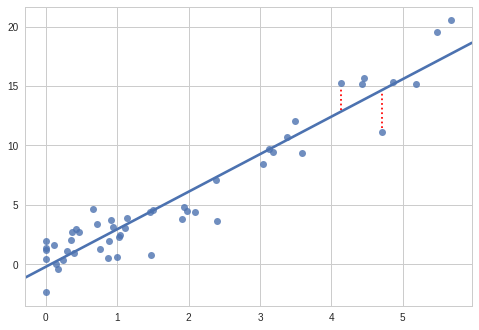

In [105]:
sns.regplot(x, y, ci=False)
plt.plot((x[25], x[25]), (13, y[25]-0.3), 'r:');
plt.plot((x[41], x[41]), (y[41]+0.3, 14.5), 'r:');

In [2]:
import pandas as pd
from pandas import DataFrame as DF, Series

import numpy as np

import scipy.stats as st

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
gnbu = sns.color_palette('GnBu', 40)
sns.set_style('whitegrid')

### Read data files to dict

In [3]:
sets = ['batting',
        'pitching',
        'player',
        'salary']
data = {}
for s in sets:
    file = s + '.csv'
    data[s] = pd.read_csv(file)

# EDA

### Function to print data info and summary stats

In [4]:
def summary(data):
    # data info
    print('DATA INFO \n')
    data.info()
    print(50*'-', '\n')
    # numeric summary
    print('NUMERIC \n')
    print(data.describe().T)
    print(50*'-', '\n')
    # categorical summary
    print('CATEGORICAL \n')
    print(data.describe(include=['O']).T)

In [5]:
# import pandas scatter_matrix to create pair-plots
from pandas.plotting import scatter_matrix

## Batting

### Summary Stats

In [6]:
summary(data['batting'])

DATA INFO 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101332 entries, 0 to 101331
Data columns (total 22 columns):
player_id    101332 non-null object
year         101332 non-null int64
stint        101332 non-null int64
team_id      101332 non-null object
league_id    100595 non-null object
g            101332 non-null int64
ab           96183 non-null float64
r            96183 non-null float64
h            96183 non-null float64
double       96183 non-null float64
triple       96183 non-null float64
hr           96183 non-null float64
rbi          95759 non-null float64
sb           94883 non-null float64
cs           72729 non-null float64
bb           96183 non-null float64
so           88345 non-null float64
ibb          59620 non-null float64
hbp          93373 non-null float64
sh           89845 non-null float64
sf           60151 non-null float64
g_idp        70075 non-null float64
dtypes: float64(16), int64(3), object(3)
memory usage: 17.0+ MB
------------------------

### Pair Plots

In [18]:
# features to plot
cols = list(data['batting'].loc[:1, 'r':'rbi'].columns) + ['team_id']
cols

['r', 'h', 'double', 'triple', 'hr', 'rbi', 'team_id']

In [29]:
teams = data['batting'].team_id.value_counts().head(3).index
colors = {teams[0]: 'r', teams[1]: 'g', teams[2]: 'b'}
subset = data['batting'][data['batting'].team_id.isin(teams)][cols].sample(frac=0.15)

In [32]:
teams

Index(['CHN', 'PHI', 'PIT'], dtype='object')

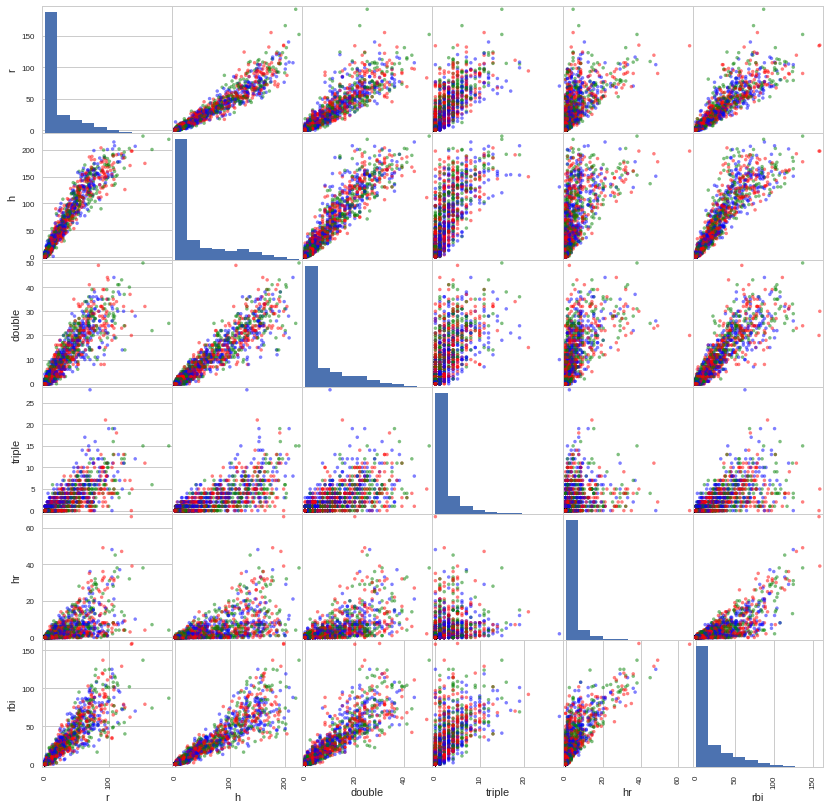

In [31]:
scatter_matrix(subset, c=subset.team_id.apply(lambda x: colors[x]), alpha=0.5, figsize=(14,14));